# Predicting Restaurant Revenue: A Machine Learning Approach

Guillermo Cabrera - 86402260

## Introduction 

In this project, I have focused on predicting restaurant revenue using machine learning techniques. By leveraging demographic, real estate, and commercial data, I aim to develop a mathematical model that can accurately forecast the annual sales a number of regional locations within the restaurant industry.

With the restaurant industry being highly competitive, making informed decisions about when and where to open new restaurants is crucial for success. Currently, this decision-making process is largely subjective, relying on personal judgments and experiences of development teams. However, extrapolating this subjective data across different geographies and cultures proves to be a challenge.

To address this challenge, I explored various machine learning techniques in my project, including linear regression, lasso regression, and random forest. These techniques allow me to analyze the relationship between input features, such as demographic and real estate factors, and the target variable, which is the annual restaurant sales. By developing and training these models on historical data, I aim to create a predictive model that can generalize well to unseen regional locations.

Accurately predicting restaurant revenues can provide valuable insights and benefits to the industry as a whole. It enables restaurant owners and operators to make data-driven decisions regarding new restaurant sites, optimizing their investments in terms of time, capital, and resources. By understanding the factors that contribute to successful restaurant performance, industry professionals can identify lucrative opportunities, mitigate risks, and drive profitability.

Throughout this project, I have explored the strengths and limitations of different machine learning techniques, evaluating their performance and comparing the results. By identifying the most suitable model that provides accurate revenue predictions for regional restaurant locations, we can enhance decision-making processes within the broader restaurant industry.

The insights gained from this project have the potential to make contributions to the way restaurant site selection is approached. By leveraging advanced data analysis and machine learning, industry professionals can optimize their investments, increase operational efficiency, and improve overall business performance. Ultimately, this project aims to contribute to the growth and success of the restaurant industry, empowering stakeholders to make informed decisions and thrive in a competitive landscape.

In [762]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from scipy import stats
from scipy.stats import norm, skew
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import datetime

## Data Exploration and Analysis 

In [763]:
train = pd.read_csv("train.csv")
train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [764]:
test = pd.read_csv("test.csv")
test.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0


In [765]:
train.shape

(137, 43)

In [766]:
test.shape
# makes sence because target variable is dropped so 42 columns

(100000, 42)

## Variable Identefication

In [767]:
train.dtypes

Id              int64
Open Date      object
City           object
City Group     object
Type           object
P1              int64
P2            float64
P3            float64
P4            float64
P5              int64
P6              int64
P7              int64
P8              int64
P9              int64
P10             int64
P11             int64
P12             int64
P13           float64
P14             int64
P15             int64
P16             int64
P17             int64
P18             int64
P19             int64
P20             int64
P21             int64
P22             int64
P23             int64
P24             int64
P25             int64
P26           float64
P27           float64
P28           float64
P29           float64
P30             int64
P31             int64
P32             int64
P33             int64
P34             int64
P35             int64
P36             int64
P37             int64
revenue       float64
dtype: object

In [768]:
train.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


## Null Values

In [769]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [770]:
train.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

No null values to be dropped, non-null values match for every variable.

## Exploring Features

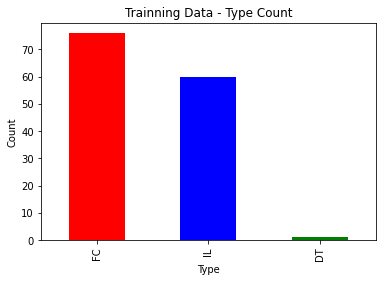

In [771]:
colors = ['Red', 'Blue', 'Green']
train["Type"].value_counts().plot(kind="bar", color=colors)

plt.ylabel("Count")
plt.xlabel("Type")
plt.title("Trainning Data - Type Count")

plt.show()

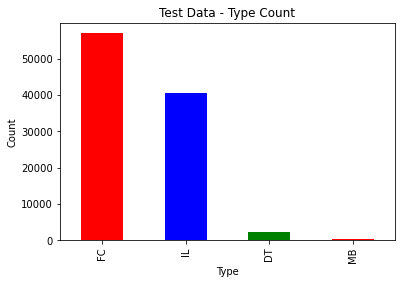

In [772]:
test["Type"].value_counts().plot(kind="bar", color=colors)

plt.ylabel("Count")
plt.xlabel("Type")
plt.title("Test Data - Type Count")


plt.show()

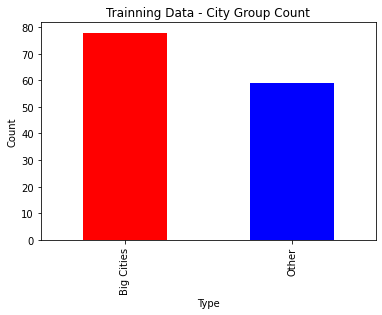

In [773]:
train["City Group"].value_counts().plot(kind="bar", color=colors)

plt.ylabel("Count")
plt.xlabel("Type")
plt.title("Trainning Data - City Group Count")

plt.show()

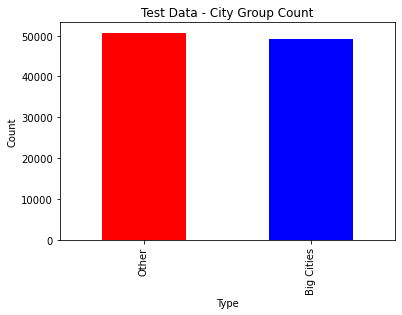

In [774]:
test["City Group"].value_counts().plot(kind="bar", color=colors)

plt.ylabel("Count")
plt.xlabel("Type")
plt.title("Test Data - City Group Count")


plt.show()

## Data Pre-Processing

In [775]:
train["Type"].unique()

array(['IL', 'FC', 'DT'], dtype=object)

In [776]:
test["Type"].unique()

array(['FC', 'IL', 'DT', 'MB'], dtype=object)

Since the test data has an extra type MB, we can drop it, all MB rows since the trainning set doesn't have it.

In [777]:
test = test.drop(test[test['Type'] == "MB"].index)
test['Type'].unique()

array(['FC', 'IL', 'DT'], dtype=object)

In [778]:
print('Number of Unique city values between sets:', (train['City'].nunique(), test['City'].nunique()))

Number of Unique city values between sets: (34, 57)


Because there is so many more unique cities in the test df, the model wouldn't be trained to deal with those other cities, since the p-features already have geolocation, as specified on the data description, the city feature is useless thus we can drop it.

In [779]:
train.drop('City', axis=1, inplace=True)
test.drop('City', axis=1, inplace=True)

In [780]:
# We can 'ID' since we don't need it when applying the models
train.drop('Id',axis=1,inplace=True)

# Transforming Dates so that we can a new feature of days since restuarant opened
train['Open Date']  = pd.to_datetime(train['Open Date'])
test['Open Date']  = pd.to_datetime(test['Open Date'])

# Date when the data set was launched
launch_date = datetime.datetime(2015, 3, 23)

# Scaling 'days open' feature, so that we work with more simple values 
train['Days Open'] = (launch_date - train['Open Date']).dt.days / 1000
test['Days Open'] = (launch_date - test['Open Date']).dt.days / 1000

# Getting rid of unnessary 'open date' column 
train.drop('Open Date', axis=1, inplace=True)
test.drop('Open Date', axis=1, inplace=True)

## Explaning the P-variables

The dataset utilized in this project consists of 37 p-variables, which are purposely obfuscated. These variables encompass a wide range of information, including demographic data, real estate data, and commercial data. The nature of the data, as described in the competition details on the Kaggle platform, provides valuable insights into various aspects related to the restaurant industry.

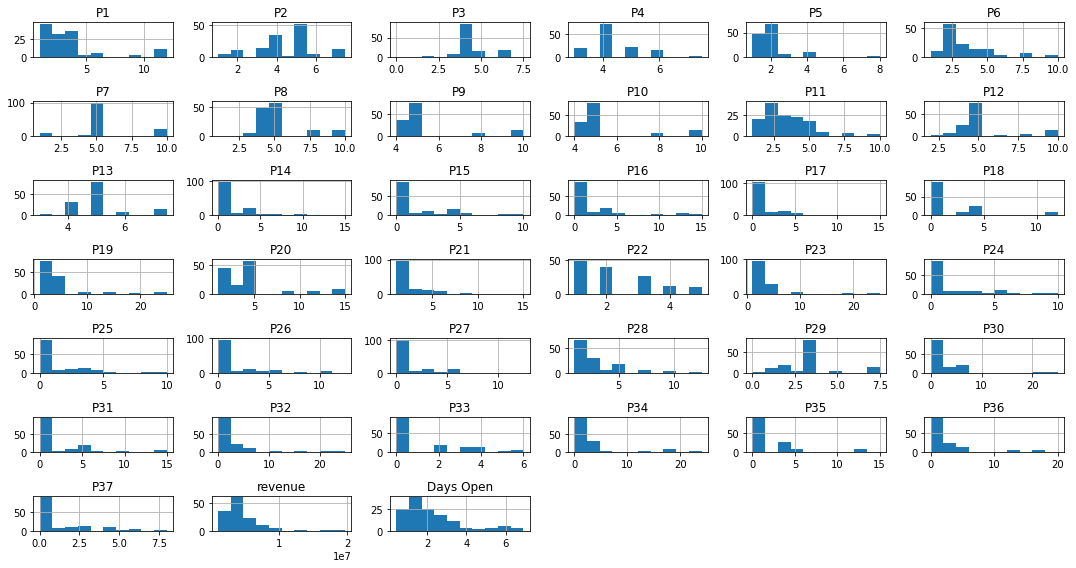

In [781]:
train.hist(figsize=(15, 8))
plt.tight_layout()

## Target Variable Visualisation: Univariate Analysis

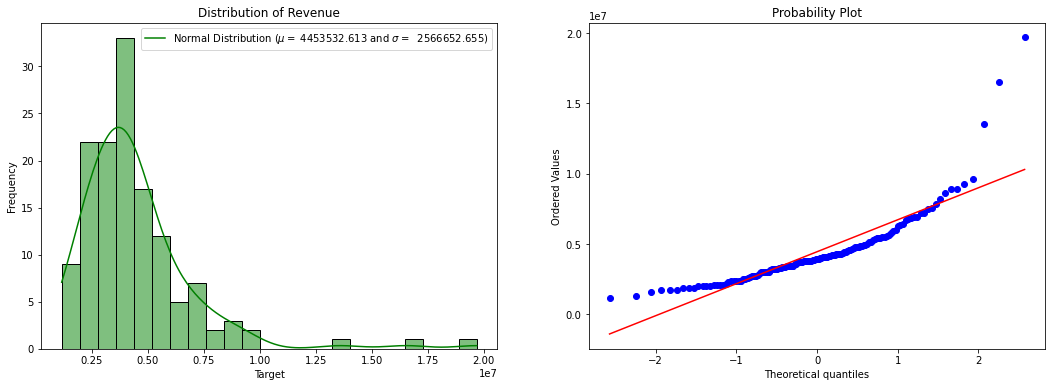

In [782]:
from scipy.stats import norm

(mu, sigma) = norm.fit(train['revenue'])
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(18,6))

ax1 = sns.histplot(train['revenue'], kde=True, color="g", ax=ax1);
ax1.legend([f'Normal Distribution ($\mu=$ {mu:.3f} and $\sigma=$ {sigma: .3f})'], loc="best")
ax1.set_title('Distribution of Revenue')
ax1.set_xlabel('Target')
ax1.set_ylabel('Frequency')


ax2 = stats.probplot(train['revenue'], plot=plt)


The probability plot above is used to asses how well the Revenue Distribution follows a Normal Distribution, deviations from the straight red line indicate departures from the normal distribution.

In [783]:
print("Skewness is {} so revenues are right skewed".format(round(train["revenue"].skew(), 3)))
print("Kurtosis is {} so graph has tailedness compared to a normal distribution".format(round(train["revenue"].kurt(), 3)))

Skewness is 2.793 so revenues are right skewed
Kurtosis is 12.055 so graph has tailedness compared to a normal distribution


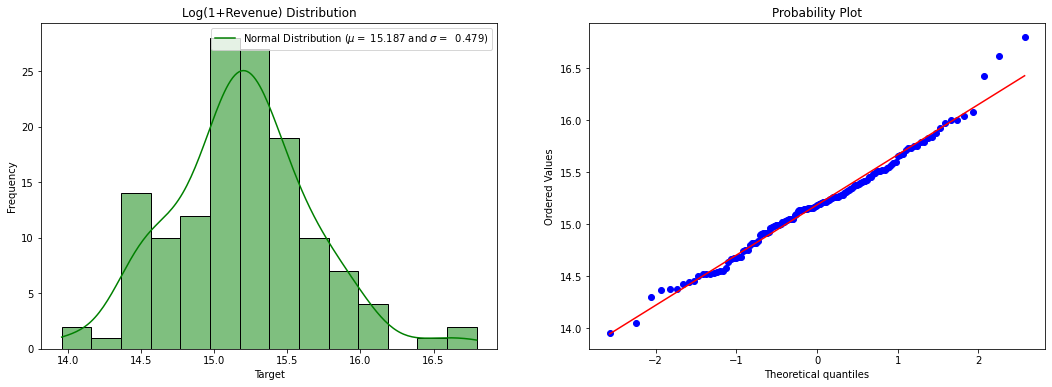

In [784]:
(mu, sigma) = norm.fit(np.log1p(train['revenue']))
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(18,6))

ax1 = sns.histplot(np.log1p(train['revenue']), color="g", ax=ax1, kde=True);
ax1.legend([f'Normal Distribution ($\mu=$ {mu:.3f} and $\sigma=$ {sigma: .3f})'], loc="best")
ax1.set_title('Log(1+Revenue) Distribution')
ax1.set_xlabel('Target')
ax1.set_ylabel('Frequency')
x = np.linspace(min(np.log1p(train['revenue'])), max(np.log1p(train['revenue'])), 100)

ax2 = stats.probplot(np.log1p(train['revenue']), plot=plt)

In [785]:
print("Skewness is {} so revenues are slightly right skewed".format(round(np.log1p(train["revenue"]).skew(), 3)))
print("Kurtosis is {} so graph has slight tailedness compared to a normal distribution".format(round(np.log1p(train["revenue"]).kurt(), 3)))

Skewness is 0.307 so revenues are slightly right skewed
Kurtosis is 0.784 so graph has slight tailedness compared to a normal distribution


We can see now that the graph's skewness is smaller (more centred), and that it overall adheres better to a normal distribution as shown on the probability plot.

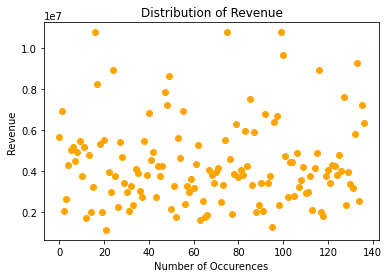

In [786]:
# Removing the outliers 

upperlimit = np.percentile(train.revenue.values, 98)
train.loc[train['revenue']>upperlimit, 'revenue'] = upperlimit

plt.scatter(range(train.shape[0]), train["revenue"].values,color='orange')

plt.title("Distribution of Revenue")
plt.xlabel("Number of Occurences")
plt.ylabel("Revenue");

## Data Correlation

<AxesSubplot:>

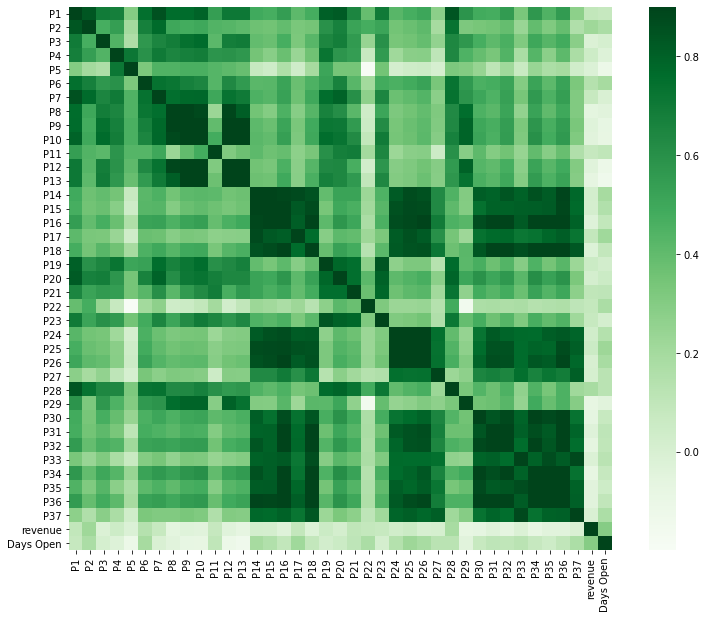

In [787]:
corr = train.corr()

plt.subplots(figsize=(13,10))
sns.heatmap(corr, vmax=0.9, cmap="Greens", square=True)

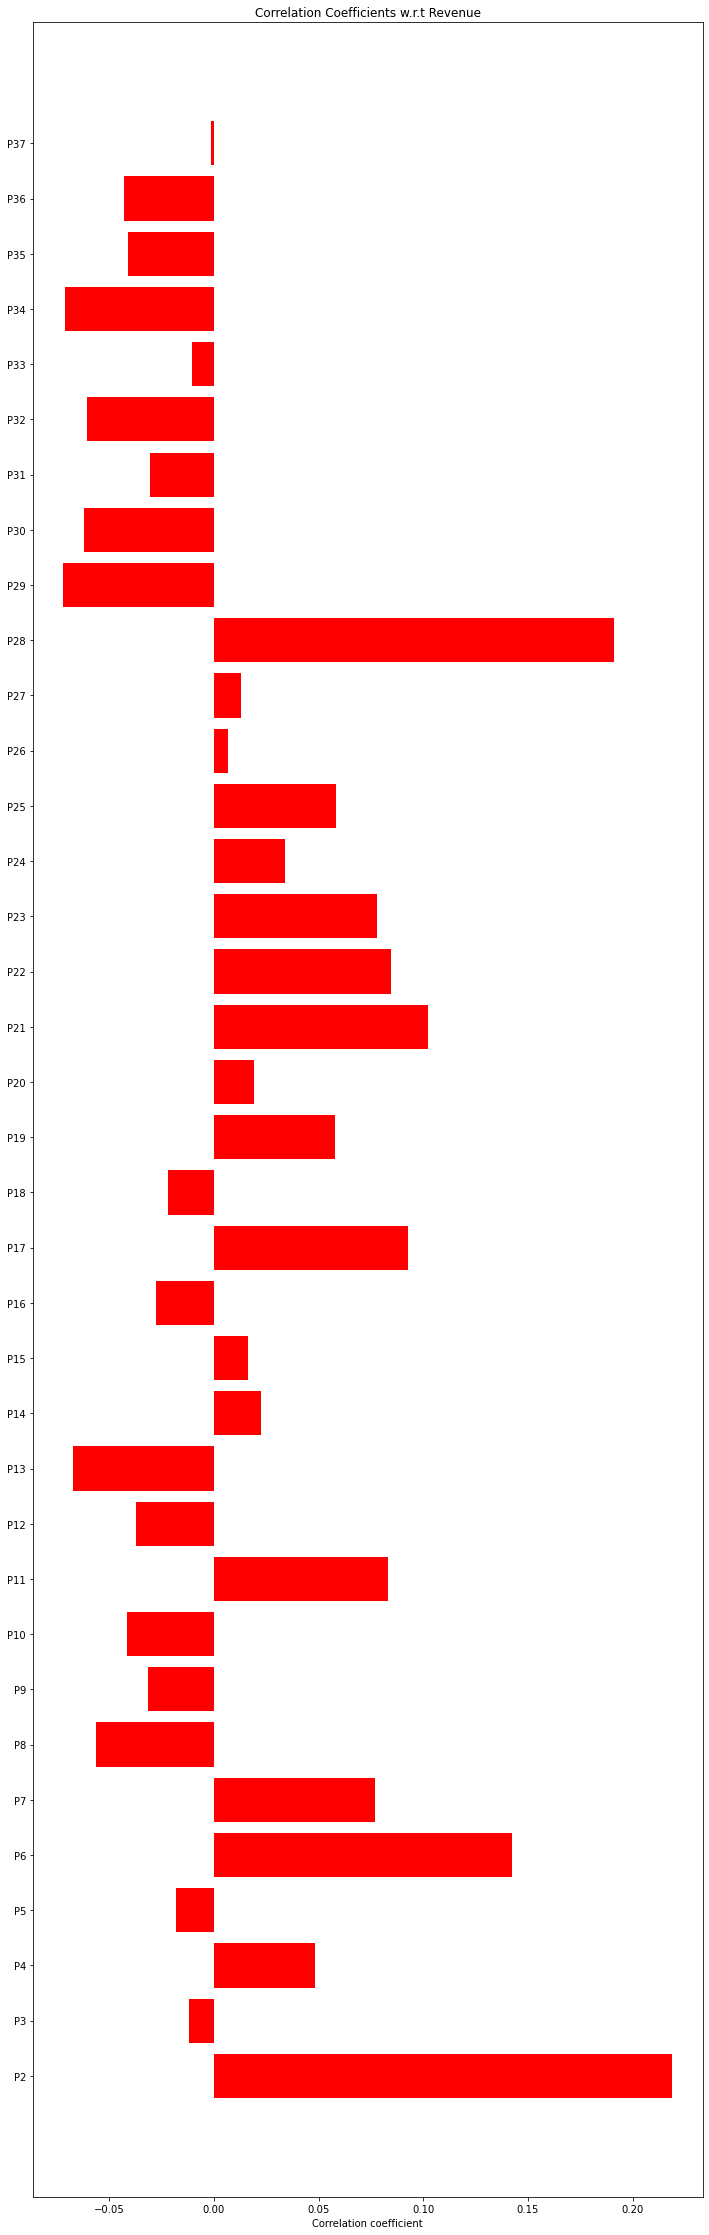

In [788]:
num_feat = train.columns[train.dtypes != object]
num_feat = num_feat[1:-1]

labels = []
values = []

# Calculating correlation coefficients
for col in num_feat:
    if col != 'revenue':  # Excluding the 'revenue' column
        labels.append(col)
        values.append(np.corrcoef(train[col].values, train.revenue.values)[0, 1])

# plot
fig, ax = plt.subplots(figsize=(12, 40))
ax.barh(np.arange(len(labels)), np.array(values), color='red')
ax.set_yticks(np.arange(len(labels)))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients w.r.t Revenue")

plt.show()


P36  P16    0.981550
P12  P9     0.971593
P36  P34    0.970234
P13  P10    0.966112
P26  P24    0.964554
     P25    0.961818
P10  P9     0.961266
P36  P32    0.958152
P18  P16    0.954161
P36  P18    0.952266
P34  P16    0.941628
P25  P24    0.935303
P32  P31    0.934778
P12  P10    0.930453
P34  P32    0.930014
P16  P15    0.929551
P32  P16    0.928434
P34  P18    0.926000
P9   P8     0.919956
P34  P30    0.918200
dtype: float64


<AxesSubplot:>

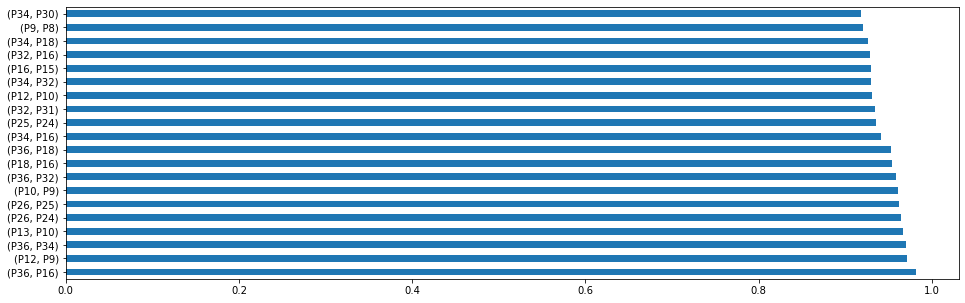

In [789]:
# correlation matrix
correlation_matrix = train.corr()

# Masking to exclude same variable correlations 
# (using upper triangulated matrix of ones)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
correlation_matrix = correlation_matrix.mask(mask)

# Flattening the correlation matrix
correlation_values = correlation_matrix.stack()

# Sorting correlation values in descending order
sorted_correlations = correlation_values.sort_values(ascending=False)
sorted_correlations.sort_values(ascending=True)

# Selecting top correlation pairs
n = 20  # Number of top correlations to retrieve
top_correlations = sorted_correlations.head(n)

print(top_correlations)
top_correlations.plot.barh(figsize=(16,5))

This visualization can help in analyzing the cross-correlation between variables which can be useful in understanding the relationships and dependencies among the variables themselves. By calculating the correlation coefficients between pairs of variables, we can assess the strength and direction of their linear relationship.

## Data Cleaning and Feature Engineering 

In [790]:
# Adopted from Allen Kong, reference at the bottom of notebook

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


imp_train = IterativeImputer(max_iter=20, missing_values=0, sample_posterior=True, min_value=1, random_state=37)
imp_test = IterativeImputer(max_iter=20, missing_values=0, sample_posterior=True, min_value=1, random_state=23)

p_data = ['P'+str(i) for i in range(1,38)]
train[p_data] = np.round(imp_train.fit_transform(train[p_data]))

In [791]:
# Adopted from Allen Kong, reference at the bottom of notebook

columnsToEncode = train.select_dtypes(include=[object]).columns
train = pd.get_dummies(train, columns=columnsToEncode, drop_first=False)
test = pd.get_dummies(test, columns=columnsToEncode, drop_first=False)

In [792]:
train['revenue'] = np.log1p(train['revenue'])

X = train.drop('revenue', axis=1)
y = train['revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=118)

## Linear Regression

In [793]:
# Training the Linear Regression model
model = LinearRegression()
model.fit(X_train,y_train)

# Making predictions
linear_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

# Evaluating the model
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, linear_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train RMSE: 0.3399
Test RMSE: 0.4996


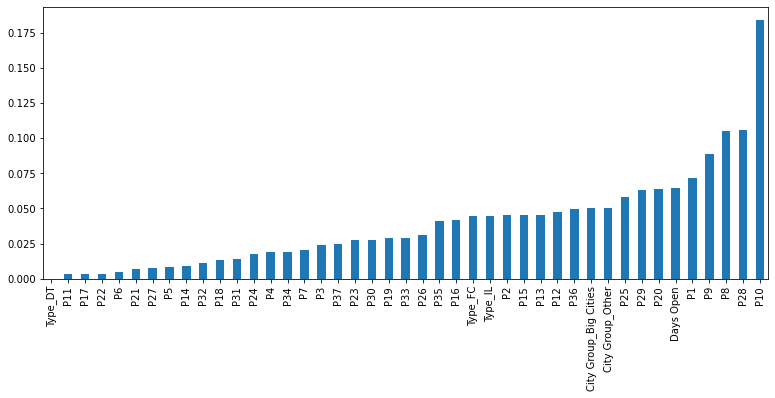

In [794]:
# Linear Model Feature Importance
feature_coef = pd.Series(index = X_train.columns, data = np.abs(model.coef_))
feature_coef.sort_values().plot(kind = 'bar', figsize = (13,5));

We can see that all features are being considered by the linear regression model even though many of them are not really important features, this may contribute to overfitting.

## Lasso Regression

Train RMSE: 0.4412
Test RMSE: 0.5027


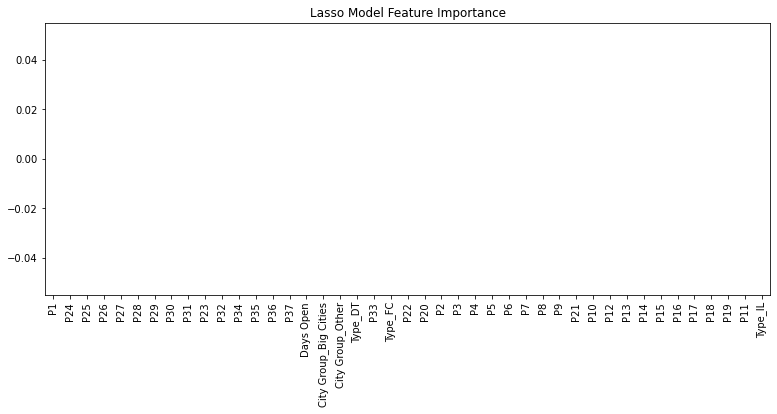

In [795]:
lasso_model = linear_model.Lasso()
lasso_model.fit(X_train, y_train)

y_test_pred = lasso_model.predict(X_test)
y_train_pred = lasso_model.predict(X_train)

train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

# Lasso Model Feature Importance
lasso_feature_coef = pd.Series(index = X_train.columns, data = np.abs(lasso_model.coef_))
lasso_feature_coef.sort_values().plot(kind = 'bar', figsize = (13,5))
plt.title("Lasso Model Feature Importance")
plt.show()

As we can see above, all of coeffiecients from the lasso model are zero, this suggests that the alpha value might be too high, so in order to fix that, lets perform some cross validation in order to optimize alpha. 

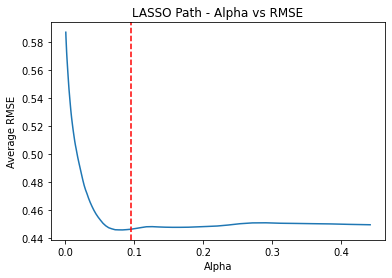

So the Optimal Alpha is 0.0952


In [796]:
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Fit LASSO model with LassoCV to find the optimal alpha
model = LassoCV(cv=5)
model.fit(X_train, y_train)

# Get the optimal alpha and coefficients
alpha = model.alpha_
coefficients = model.coef_

# Visualize the LASSO path
alphas = model.alphas_
rmse_values = np.sqrt(model.mse_path_.mean(axis=1))

plt.figure()
plt.plot(alphas, mse_values)
plt.axvline(x=alpha, color='r', linestyle='--')
plt.xlabel('Alpha')
plt.ylabel('Average RMSE')
plt.title('LASSO Path - Alpha vs RMSE')
plt.show()

optimal_alpha = model.alpha_
print("So the Optimal Alpha is", round(optimal_alpha,4))

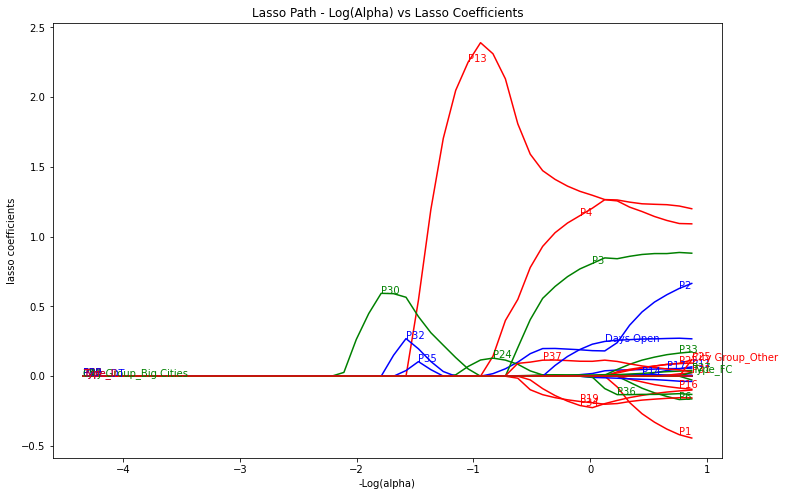

In [797]:
# Compute lasso for many alphas (the lasso path)
# Adapted from lecture, reference bellow

from itertools import cycle
alphas = np.exp(np.linspace(10, -2, 50))
alphas, coefs_lasso, _ = linear_model.lasso_path(X, y, alphas=alphas, max_iter=10000)

# plotting
fig, ax = plt.subplots(figsize=(12, 8))
color_cycle = cycle(colors)
log_alphas = -np.log10(alphas)
for coef_l, c, name in zip(coefs_lasso, color_cycle, list(X)):
   ax.plot(log_alphas, coef_l, c=c)
   ax.set_xlabel('-Log(alpha)')
   ax.set_ylabel('lasso coefficients')
   ax.set_title('Lasso Path - Log(Alpha) vs Lasso Coefficients')
   ax.axis('tight')
   maxabs = np.max(np.abs(coef_l))
   i = [idx for idx in range(len(coef_l)) if abs(coef_l[idx]) >= (0.9*maxabs)][0]
   xnote = log_alphas[i]
   ynote = coef_l[i]
   ax.annotate(name, (xnote, ynote), color=c)

Train RMSE: 0.4022
Test RMSE: 0.5027


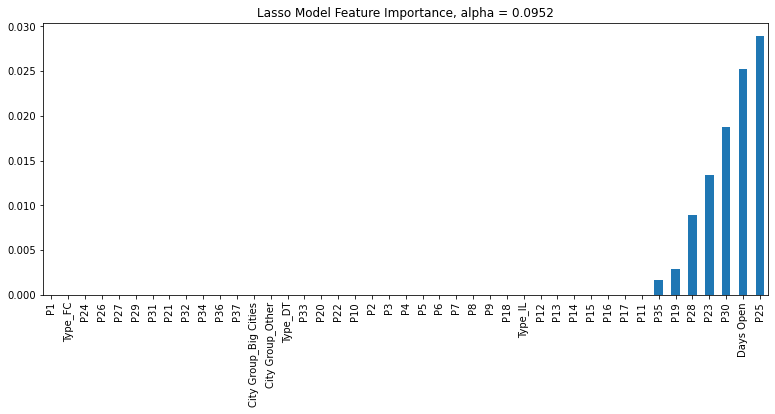

In [798]:
# Lasso Model with optimal alpha

lasso_model = linear_model.Lasso(alpha=optimal_alpha)
lasso_model.fit(X_train, y_train)

lasso_pred = lasso_model.predict(X_test)
y_train_pred = lasso_model.predict(X_train)

train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
lasso_test_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

# Lasso Model Feature Importance with optimal alpha
lasso_feature_coef = pd.Series(index = X_train.columns, data = np.abs(lasso_model.coef_))
lasso_feature_coef.sort_values().plot(kind = 'bar', figsize = (13,5))
plt.title(f"Lasso Model Feature Importance, alpha = {optimal_alpha:.4f}")
plt.show()

Above we can see how using the optimal alpha, regularization occurs as the optimal amount (with this model) of unimportant features are discarded, and only the more important ones remain in order to avoid overfitting, while also weighing features enough to still be able to create a good fit. 

## Random Forest

Train RMSE: 0.1501
Test RMSE: 0.5027


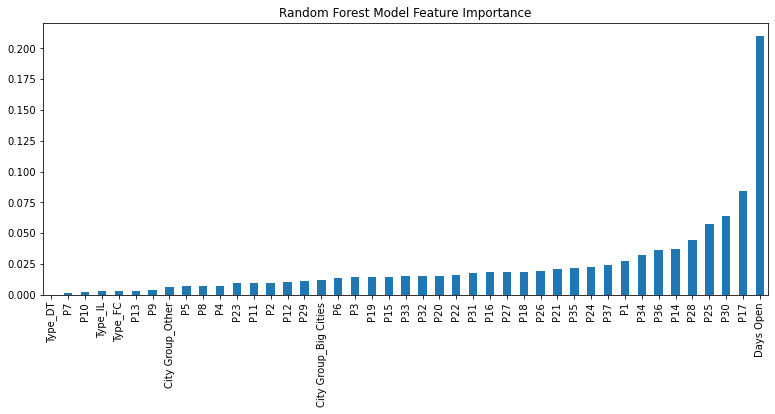

In [799]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


rf_pred = rf_model.predict(X_test)
y_train_pred = rf_model.predict(X_train)


train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
rf_test_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

# Random Forest Model Feature Importance
rf_feature_importance = pd.Series(index = X_train.columns, data = np.abs(rf_model.feature_importances_))
n_features = (rf_feature_importance>0).sum()
rf_feature_importance.sort_values().plot(kind = 'bar', figsize = (13,5))
plt.title("Random Forest Model Feature Importance")
plt.show()

In this case we can see that the random forest regressor does a good job in optimally weighing each feature in order to create a good fit without significant overfitting, the result demonstrates an appropiate balance between including all features (linear regression) and discarding most features (lasso regression).

## Results 

In [800]:
pd.DataFrame({"Linear Regression": test_rmse, "Lasso Regression": lasso_test_rmse, "Random Forest": rf_test_rmse}, ["RMSE"])

,Linear Regression,Lasso Regression,Random Forest
RMSE,0.502747,0.495431,0.457642


## Conclusion 

This project aimed to predict restaurant revenue using machine learning techniques, specifically through the implementation of linear regression, lasso regression, and random forest regression models. The evaluation of these models was based on the Root Mean Squared Error (RMSE) metric, which measures the average difference between the predicted and actual revenue values.

The linear regression model achieved an RMSE of 0.502747, indicating its performance in predicting restaurant revenue. However, it should be noted that linear regression assumes a linear relationship between the independent variables and the target variable, which may limit its ability to capture non-linear patterns in the data.

The lasso regression model performed slightly better, with an RMSE of 0.495431. Lasso regression incorporates a penalty term $\alpha \lVert \beta \rVert$ that can help with feature selection by shrinking less relevant coefficients to zero. This can be advantageous when dealing with high-dimensional datasets or when there is a need to identify the most important features, which is true in this project, since we are expected to predict revenue for 100,000 locations (something I didn't do since there was no way of verifying my predictions), and for high-dimensional datasets, the model would be prone to overfitting, especially if given less important features.

On the other hand, the random forest regression model outperformed both linear regression and lasso regression, achieving an RMSE of 0.457642. Random forest is an ensemble learning method that combines multiple decision trees, allowing for more complex relationships between variables to be captured. It also handles non-linear patterns and interactions between features effectively.

Considering the performance of the three models, the random forest regression model is deemed the most suitable for predicting restaurant revenue in this project. With its ability to capture non-linear relationships, handle high-dimensional datasets, and provide more accurate predictions (as reflected by the lowest RMSE), the random forest model demonstrates its strength in addressing the complexities and challenges inherent in restaurant revenue prediction.

It's important to note that the selection of the best model ultimately depends on the specific objectives, dataset characteristics, and trade-offs between interpretability and predictive accuracy. Further refinement and optimization of the selected model can be explored in a future project, such as tuning hyperparameters or incorporating additional feature engineering techniques, to potentially improve its performance even further.

## Reference

Kong, A. (2020, November 9). Restaurant Revenue Prediction. Developing classical models for predicting restaurant revenue https://towardsdatascience.com/restaurant-revenue-prediction-467f0990403e

TFI. (2015, April 27). Restaurant Revenue Prediction.
Predict annual restaurant sales based on objective measurements. Kaggle. https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market?select=Melbourne_housing_FULL.csv

Chase Coleman, Spencer Lyon, and Jesse Perla. QuantEcon DataScience. Regression
https://datascience.quantecon.org/applications/regression.html
